# Stroke 

stroke is, according to the World Health Organization (WHO), the second leading cause of death globally, and is responsible for approximately 11% of all deaths.
in my project, We will analyze the most relevant risk factors for stroke as well as predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases and smoking status. Using the Classification model.

### About the Features



1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

###  What is the Problem 

In the given study, we have a binary classification problem.

We will make a prection on the target variable - Strokes

Lastly we will build a variety of Classification models and compare the models giving the best prediction on strokes



In [1]:
! pip install -U imbalanced-learn

imbalanced-learn is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance.

### Step 1: Imports Libraries 

In [2]:
# munging imports
import pandas as pd # data processing, CSV file - Dataframe
import numpy as np # linear algebra - Arraies

# visualization imports
import matplotlib.pyplot as plt # plotting - Visualization 
import seaborn as sns # Visualization 

# modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import preprocessing
from sklearn import metrics

%matplotlib inline 

### Step 2: Read Data

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv') # Load dataset anto a dataframe

In [4]:
df #display dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.head() #Check the first five rows 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail() #Check the last five rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.info() #information Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


As it can seen from the information above that our data contains 12 columns, 7 numerical variables and others are categorical, Also has missing values in `bmi`

In [8]:
df.dtypes # View column data types

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

As it can seen from the data type features above that our data four integer, three float variables and five are categorical.

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The table above shows seven statistical summary of numerical features in the dataset. The minimum value of number of `avg_glucose_level` is 55 and maximum 271! middle 50% 91 and maximum 271 , This is above normal. We have outliers. and The minimum value of number of `bmi`is 10 and maximum 97! middle 50% 28 and maximum 97 This is above normal. We have outliers.

In [10]:
#df.corr()['stroke'].sort_values(ascending=False)

### Step 3: Clean Data

In [11]:
df.drop(['id'], axis=1, inplace=True) #drop id column 

drop id column 

In [12]:
duplicates = df.duplicated().sum()
print('Duplicates in data: {0}'.format(duplicates)) #Check Duplicates

Duplicates in data: 0


outcomes:

There is no duplicate rows in this dataset.

In [13]:
df[df.gender=="Other"] 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Display 'Other' value in gender column

In [14]:
df.drop(df[df['gender']=='Other'].index,inplace=True) #Drop oother value 

Drop Other value from the gender column

In [15]:
df['gender'].value_counts() #Display gender column

Female    2994
Male      2115
Name: gender, dtype: int64

Display the number of males and females

In [16]:
df['ever_married'].replace({"Yes": "married", "No": "single"}, inplace=True) #replace

In `ever_married` column, replace the value Yes with 'Married' and No with 'Single'

In [17]:
df['stroke'].replace({1: "yes", 0: "no"}, inplace=True) #غير قيمة الفيتشر سترك من 0 و1 الى يس ونو

In `stroke` column, replace the value 1 with 'Yes' and 0 with 'No'

In [18]:
df["ever_married"].value_counts() #ckeck

married    3353
single     1756
Name: ever_married, dtype: int64

show the number of married and single

In [19]:
df["stroke"].value_counts() #imbalance

no     4860
yes     249
Name: stroke, dtype: int64

Show how many people have had a stroke and who haven't

In [20]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset") 

There is 5109 observation and 11 columns in the dataset


Display number of observation and columns in dataset

In [21]:
df.columns 

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

show all columns names in dataset

In [22]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

age has 104 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
avg_glucose_level has 3978 unique value
bmi has 418 unique value


Show the numerical columns and how many unique values it has

In [23]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'stroke'],
      dtype='object')


Storing columns containing number in (numerical) and storing columns containing an object in (Categorical) and print .

#### check for missing value

In [24]:
# drop missing row that contain missing data and check the data again

strok_list = list(df.columns.values)

for strok in strok_list:
    print (strok,": ",sum(pd.isnull(df[strok]))) 

gender :  0
age :  0
hypertension :  0
heart_disease :  0
ever_married :  0
work_type :  0
Residence_type :  0
avg_glucose_level :  0
bmi :  201
smoking_status :  0
stroke :  0


We have 201 null values on bmi column, well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much

In [25]:
df = df.dropna()

drop all missing values in columns

In [26]:
strok_list = list(df.columns.values)

for strok in strok_list:
    print (strok,": ",sum(pd.isnull(df[strok])))

gender :  0
age :  0
hypertension :  0
heart_disease :  0
ever_married :  0
work_type :  0
Residence_type :  0
avg_glucose_level :  0
bmi :  0
smoking_status :  0
stroke :  0


Check the missing values are dropped into the BMI column

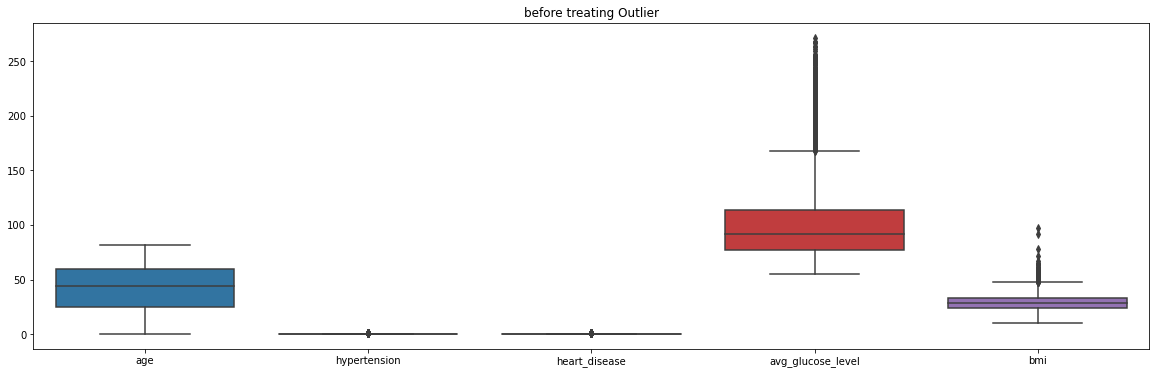

In [27]:
plt.figure(figsize=[20,6])
sns.boxplot(data=df  ).set_title("before treating Outlier");

The above graphs display two outliers values in the data set. The `avg_glucose_level` column is very high, that is, the average glucose level has increased in some patients above the normal range, and `bmi` column  a high that is, above the normal body mass, which means that the body mass in some patients exceeded the normal body mass range.

In [28]:
# This statement solved outlier problem in bmi column


def clean_outlier(column):
    q1 = np.quantile(df[column], 0.45)
    q3 = np.quantile(df[column], 0.74)
    IQR = q3 - q1
    
    min_range = q1 - 1.5 * IQR
    max_range = q3 + 1.5 * IQR
    
    mean = df[column].mean()
    df.loc[(df[column] < min_range), column] = mean
    df.loc[(df[column] > max_range), column] = mean
    

clean_outlier('avg_glucose_level')
clean_outlier('bmi')

pd.set_option('display.float_format', lambda x:'%.2f'% x)
df.describe() 

C:\Users\HP\Downloads\pythonP\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4908.00,4908.00,4908.00,4908.00,4908.00
mean,42.87,0.09,0.05,91.85,28.61
std,22.56,0.29,0.22,19.51,4.91
min,0.08,0.00,0.00,55.12,18.90
25%,25.00,0.00,0.00,77.07,25.10
50%,44.00,0.00,0.00,91.68,28.89
75%,60.00,0.00,0.00,105.30,31.50
max,82.00,1.00,1.00,147.74,41.10


I will replce these outliers values with the mean as we don't have much data and BMI don't change that much

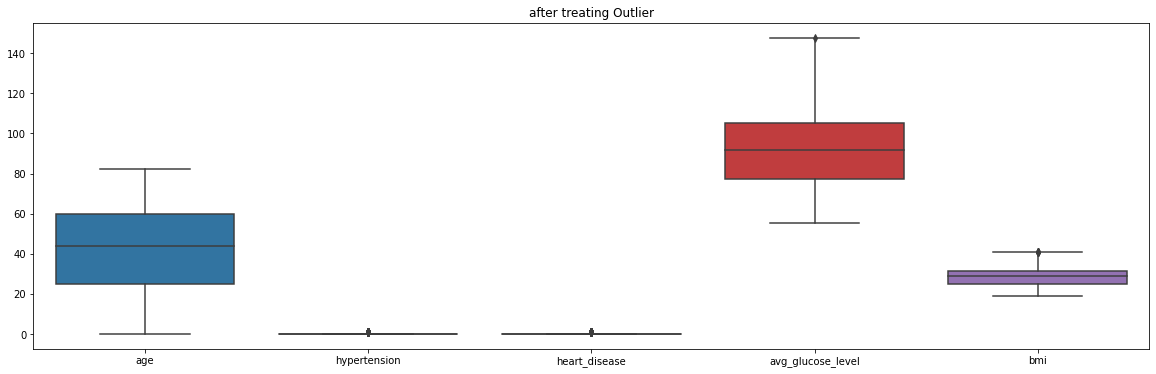

In [29]:
plt.figure(figsize=[20,6])
sns.boxplot(data=df ).set_title("after treating Outlier"); #ckeck outliers

no outliers in `avg_glucose_level` and `bmi`

### Step 4: EDA

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,married,Private,Urban,105.30,36.60,formerly smoked,yes
2,Male,80.00,0,1,married,Private,Rural,105.92,32.50,never smoked,yes
3,Female,49.00,0,0,married,Private,Urban,105.30,34.40,smokes,yes
4,Female,79.00,1,0,married,Self-employed,Rural,105.30,24.00,never smoked,yes
5,Male,81.00,0,0,married,Private,Urban,105.30,29.00,formerly smoked,yes


### solving Questions: 

##### • Who is more likely to have a stroke than a male or female, and what is the marital status, married or not?

In [31]:
rr= df.groupby(["gender","ever_married"])[["stroke"]].count().reset_index().sort_values(by="stroke",ascending=False).set_index(["gender"]) 
rr #Show all the details 

,ever_married,stroke
gender,,
Female,married,1933
Male,married,1271
Female,single,964
Male,single,740


This table shows all the details of people who have had a stroke by gender and marital status

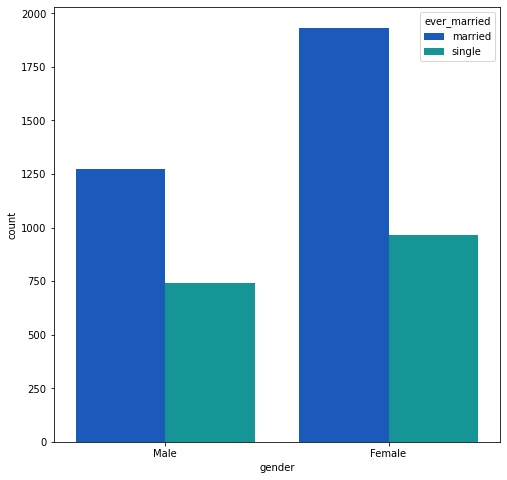

In [32]:
plt.figure(figsize = [8,8])
sns.countplot(data=df , x="gender" ,hue = "ever_married",palette=('winter'));

The above table shows that married females are more likely to have a stroke, followed by married males

##### • What is the effect of smoking status on the risk of stroke?

Text(0.5, 1.0, 'Smoking Status vs Stroke')

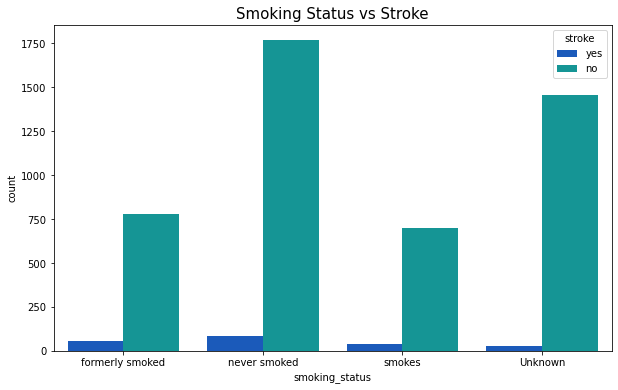

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df , x="smoking_status" ,hue = "stroke",palette=('winter'));
plt.title("Smoking Status vs Stroke", size=15)

According to the status of the people in the data set, the above table shows that non-smokers are most likely to have a stroke !

##### • What is the impact of heart patients on the risk of stroke? 

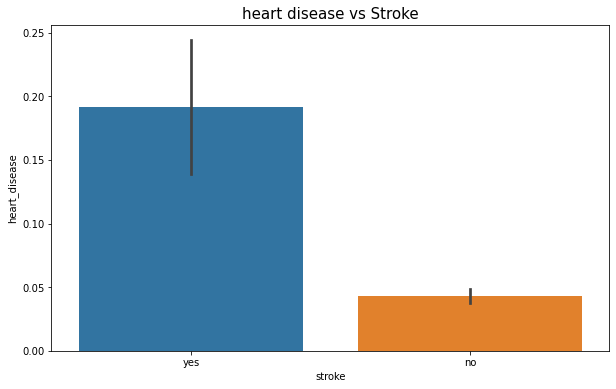

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["stroke"], y=df["heart_disease"] )
plt.title("heart disease vs Stroke", size=15)
plt.show()

The above table shows that people with heart disease are more likely to have a stroke

##### • How old are people who have had a stroke with average glucose levels?

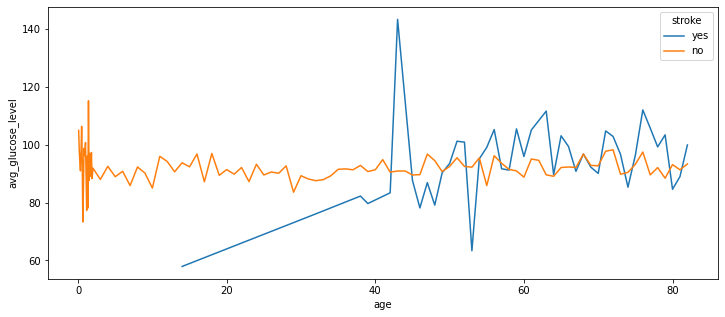

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="age", y="avg_glucose_level", hue='stroke', ci=None);

The table above shows the ages of those who have had a stroke and have a high blood glucose level

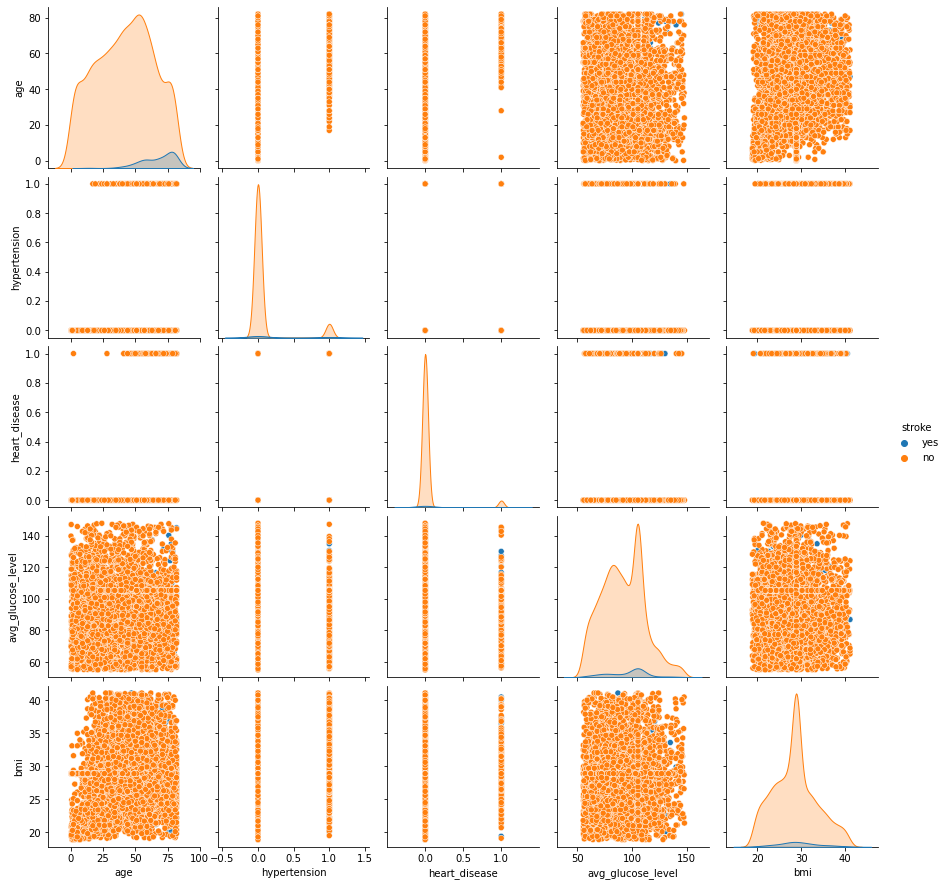

In [36]:
#sns.pairplot(df)
sns.pairplot(df,hue='stroke');

all features no correlation

In [37]:
df.stroke.value_counts() #imbalanceed

no     4699
yes     209
Name: stroke, dtype: int64

### Imbalanced  Problem 


imbalanced classification refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. That is, where the class distribution is not equal or close to equal, and is instead biased or skewed

### Applying label encoding

In [38]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'stroke'.
df['stroke']= label_encoder.fit_transform(df['stroke'])
 
df['stroke'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/783716247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stroke']= label_encoder.fit_transform(df['stroke'])


array([1, 0])

encoding `stroke` column to 0,1

In [39]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
 
df['gender'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/4046133477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']= label_encoder.fit_transform(df['gender'])


array([1, 0])

encoding `gender` column to 0,1

In [40]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'ever_married'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
 
df['ever_married'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/3069509812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']= label_encoder.fit_transform(df['ever_married'])


array([0, 1])

encoding `ever_married` column to 0,1

In [41]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'smoking_status'.
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
 
df['smoking_status'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/3901357276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])


array([1, 2, 3, 0])

encoding `smoking_status` column to 0,1,2,3

In [42]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'work_type'.
df['work_type']= label_encoder.fit_transform(df['work_type'])
 
df['work_type'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/3284193767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type']= label_encoder.fit_transform(df['work_type'])


array([2, 3, 0, 4, 1])

encoding `work_type` column to 0,1,2,3,4

In [43]:
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Residence_type'.
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
 
df['Residence_type'].unique()

C:\Users\HP\AppData\Local\Temp/ipykernel_37352/2848468236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])


array([1, 0])

encoding `Residence_type` column to 0,1

In [44]:
df.head() #show the table after encoding

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,0,2,1,105.30,36.60,1,1
2,1,80.00,0,1,0,2,0,105.92,32.50,2,1
3,0,49.00,0,0,0,2,1,105.30,34.40,3,1
4,0,79.00,1,0,0,3,0,105.30,24.00,2,1
5,1,81.00,0,0,0,2,1,105.30,29.00,1,1


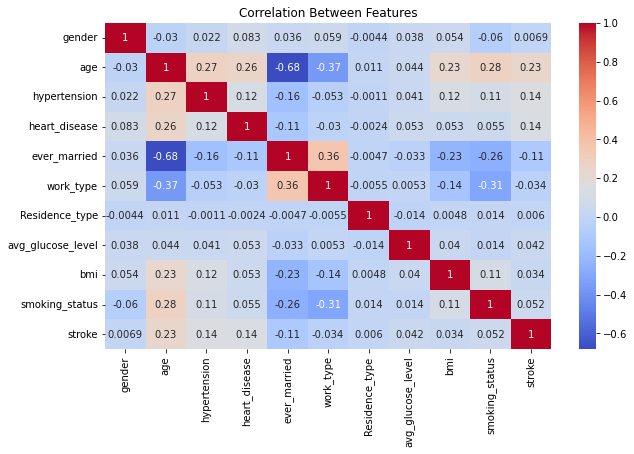

In [45]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm' ); #This statement to show the correlation for dataframe
plt.title('Correlation Between Features');

There is no correlation between the columns but in the target value `stroke` there is a correlation which is the `age` column 0.23

In [46]:
df.corr()['stroke'].sort_values(ascending=False) #The age column is the highest correlation

stroke               1.00
age                  0.23
hypertension         0.14
heart_disease        0.14
smoking_status       0.05
avg_glucose_level    0.04
bmi                  0.03
gender               0.01
Residence_type       0.01
work_type           -0.03
ever_married        -0.11
Name: stroke, dtype: float64

### Imbalanced solved

In [47]:
from imblearn.combine import SMOTETomek

X, y = df.drop('stroke', 1), df.stroke.values 
# SMOTETomek data
smt = SMOTETomek() #oversmpling with under sampling
X_res, y_res = smt.fit_resample(X, y)


C:\Users\HP\AppData\Local\Temp/ipykernel_37352/1109097148.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X, y = df.drop('stroke', 1), df.stroke.values


### Split Data

In [48]:
#getting training and test data: split the data into 80 percent training set and 20 percent testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=10, stratify=y_res)

X_train.shape, y_train.shape

((7467, 10), (7467,))

In [49]:
x= pd.Series(y_res)

In [50]:
x.value_counts() #check my target after SMOTETomek

1    4667
0    4667
dtype: int64

### Scaling

In [51]:
#scale all columns of the dataset into the same scale by using standardization method
scaler = StandardScaler()

In [52]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5: Model

### Here I take different machine learning algorithm and try find algorithm which predict accurately.

###### 1-Logistic Regression

In [53]:
m1 = 'Logistic Regression'
lr = LogisticRegression()

In [54]:
model = lr.fit(X_train_scaled,y_train)
lr_predict = lr.predict(X_test_scaled)
#rf_predicted = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
rf_conf_matrix = confusion_matrix(y_test, lr_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[711 222]
 [137 797]]


Accuracy of Logistic Regression: 80.77129084092127 

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       933
           1       0.78      0.85      0.82       934

    accuracy                           0.81      1867
   macro avg       0.81      0.81      0.81      1867
weighted avg       0.81      0.81      0.81      1867



In [55]:
print(lr_acc_score)

0.8077129084092126


###### 2-Random Forest Classifier

In [56]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=12,max_depth=7)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[748 185]
 [ 66 868]]


Accuracy of Random Forest: 86.55597214783074 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       933
           1       0.82      0.93      0.87       934

    accuracy                           0.87      1867
   macro avg       0.87      0.87      0.87      1867
weighted avg       0.87      0.87      0.87      1867



In [57]:
print(lr_acc_score)

0.8077129084092126


<AxesSubplot:>

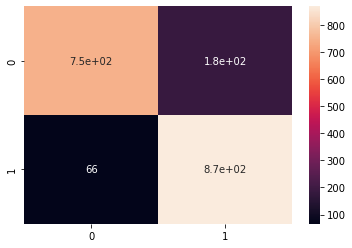

In [58]:
sns.heatmap(rf_conf_matrix , annot = True)

In [59]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

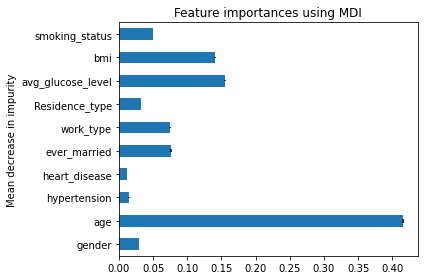

In [60]:
import pandas as pd
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

the feature importance figure for random forest that previous `age` is the most important feature in classify our target. the other important features are  `avg_glucose_level` , `bmi` 

### Step 6: Conclusion

We found a good model with adequate performance to predict whether or not a patient will have a stroke.
##### Random Forest Classfier model gives the best Accuracy compared to Logistic Regression model .

## Thank you. 